In [216]:
import cv2 as cv2
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

## Loading image

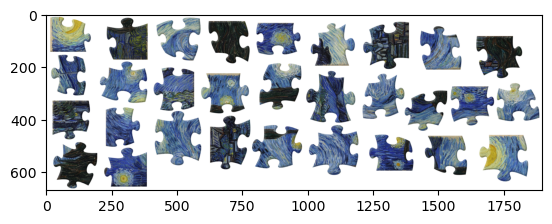

In [217]:
puzzle = cv2.imread('exemples/van-gogh.png')
plt.imshow(cv2.cvtColor(puzzle, cv2.COLOR_BGR2RGB))

## Testing the different thresholdings methods

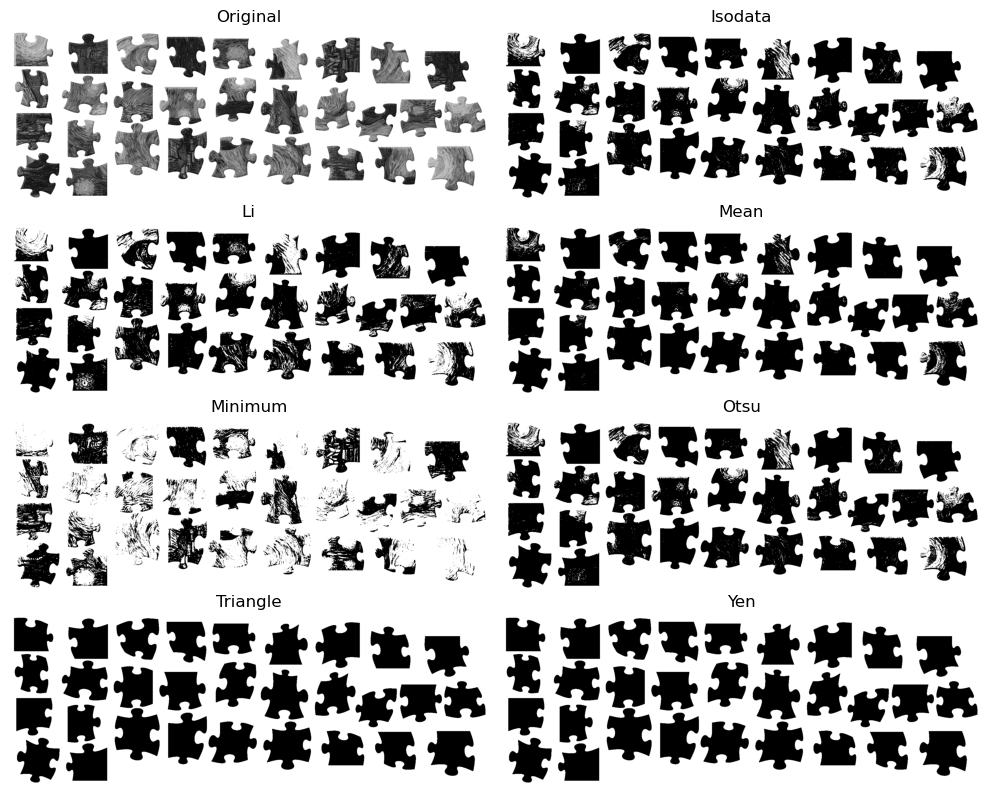

In [218]:
from skimage.filters import try_all_threshold
puzzle_for_thresholding = io.imread('exemples/van-gogh.png', as_gray=True)
fig, ax = try_all_threshold(puzzle_for_thresholding, figsize=(10, 8), verbose=False)
plt.show()

We use triangle as it seems to work best

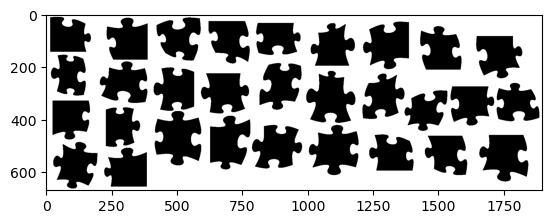

In [219]:
puzzle_gray = cv2.cvtColor(puzzle, cv2.COLOR_RGB2GRAY)
threshold, binary_puzzle = cv2.threshold(puzzle_gray, 0, 255, cv2.THRESH_TRIANGLE)
plt.imshow(binary_puzzle, cmap='gray')

## Extract pieces 
 1) Threshold the image in black and white 
 2) Use cv2.ConnectedComponentsWithStats

In [220]:
def extract_pieces(image):

        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Convert to grayscale and threshold
        # We use binary_inv to invert to have black as background and white as foreground
        threshold, binary = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_TRIANGLE)

        plt.imshow(binary, cmap='gray')
        plt.title('Binary image (white = foreground)')
        plt.show()
        # Find connected components (puzzle pieces)
        # Two pass algorithm that puts labels on connected components (same pixel value)
        num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary, connectivity=8)
        pieces = []
        for i in range(1, num_labels):  # Skip background (0)
            # Get piece coordinates
            x, y, w, h, area = stats[i]
            if area < 150:  # Skip very small components (MIGHT NEED TO ADJUST THIS VALUE)
                continue

            
            piece = np.full((h, w, 3), 255, dtype=np.uint8)
        
            # Get mask for this piece
            piece_mask = labels[y:y+h, x:x+w] == i
            
            # Expand mask to 3 channels to match the image
            piece_mask_3d = np.stack([piece_mask] * 3, axis=2)
            
            # Copy the colored piece onto white background
            piece[piece_mask_3d] = image[y:y+h, x:x+w][piece_mask_3d]
            
            pieces.append({
                'image': piece,
                'position': (x, y),
                'size': (w, h)
            })

        
        return pieces

In [221]:
def display_pieces(pieces):
    # Calculate grid size
    n = len(pieces)
    cols = 5  # Display 5 pieces per row
    rows = (n + cols - 1) // cols  # Ceiling division
    
    plt.figure(figsize=(15, 3*rows))
    
    for i, piece in enumerate(pieces):
        # Add subplot
        plt.subplot(rows, cols, i + 1)
        plt.imshow(cv2.cvtColor(piece['image'], cv2.COLOR_RGB2BGR))
        x, y = piece['position']
        w, h = piece['size']
        plt.title(f'Piece {i}\nPos: ({x},{y})\nSize: {w}x{h}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

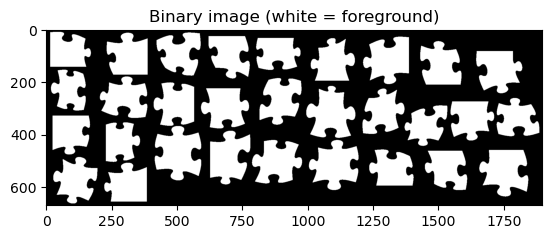

Found 30 pieces


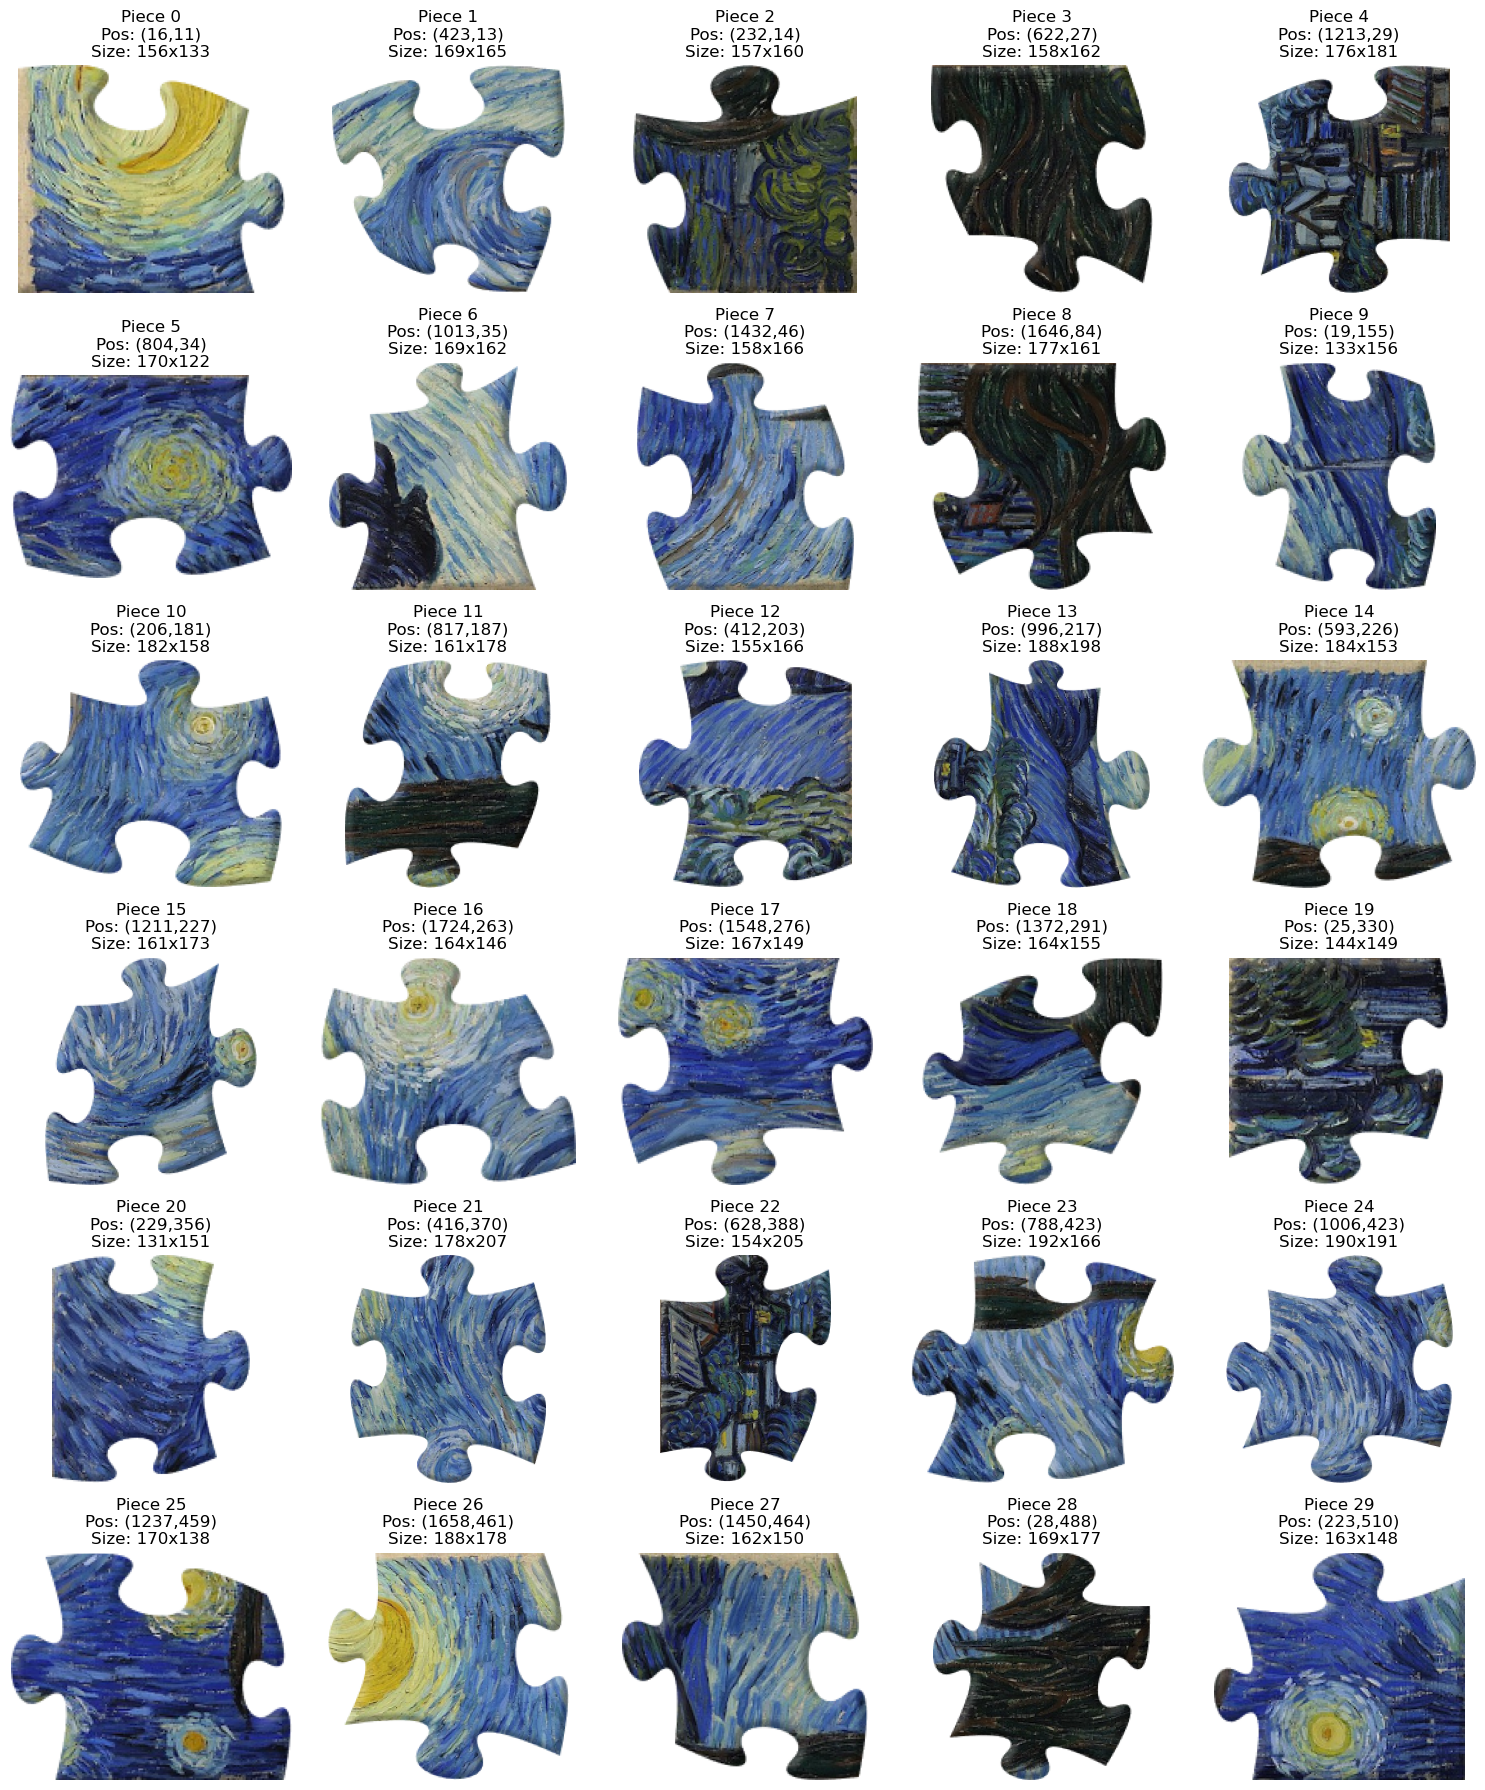

In [222]:
pieces = extract_pieces(puzzle)
print(f"Found {len(pieces)} pieces")
display_pieces(pieces)